# Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

# Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

 Country code

 Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies ��

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

Problem statement : 
In this dataset predict 2 things –

1) Average Cost for two

2) Price range

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df2 = pd.read_excel("Country-Code.xlsx")
df = pd.merge(df1,df2)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [3]:
# looking for null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Observation:

Total columns = 22 3 - float columns 5 - int columns 14 - object columns 9 null values in the Cuisines column

In [5]:
# looking at the unique values of the columns
for i in df:
    print (f"Column:{i}\nNumber of unique values:{df[i].nunique()}\nUnique values and counts:\n{df[i].value_counts()}" + '\n' +
           '-'*50+'\n')

Column:Restaurant ID
Number of unique values:9551
Unique values and counts:
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
--------------------------------------------------

Column:Restaurant Name
Number of unique values:7446
Unique values and counts:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
--------------------------------------------------

Column:Country Code
Number of unique values:15
Unique values and counts:
1      8652
216     434
215      80
30       60
214      60
189      60
148 

Observation:

Restaurant ID is completely unique for every row and will reduce the accuracy of the models and will therefore be dropped

Locality, Address, Locality Verbose can be dropped because they contain the same values. (i.e; the area), we will use the country as an identifier instead.

Switch to order menu only has one value and will also be dropped.

Rating color has no significance in the prediction of the targets and will also be dropped.

Votes is also an insignificant variable and will also be dropped.

In [6]:
# dropping the above mentioned columns
df = df.drop(df[['Restaurant ID','Locality','Locality Verbose','Address','Switch to order menu','Rating color','Votes']],axis=1)

In [7]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Country'],
      dtype='object')

In [8]:
# understanding the target variables
print(df['Average Cost for two'].nunique(),'\n',
     df['Price range'].unique())

140 
 [3 4 2 1]


Observation:

Average Cost for two → includes continuous numbers and will therefor require a regression model.

Price range → has 4 unique values and will therefore require a classification model.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Longitude             9551 non-null   float64
 4   Latitude              9551 non-null   float64
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating text           9551 non-null   object 
 14  Country               9551 non-null   object 
dtypes: float64(3), int64(

# Data Visualization

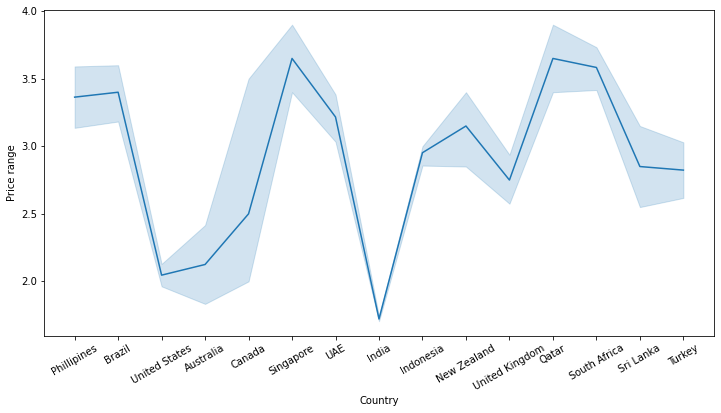

In [10]:
# plottin gthe price ranges with respect to the country
plt.figure(figsize=(12,6))
sns.lineplot(x="Country",y='Price range',data=df)
plt.xticks(rotation=30)
plt.show()

According to the above plot the price ranges are relatively high in Singapore and Qatar.

The prices are the lowest in United States, India and Australia.

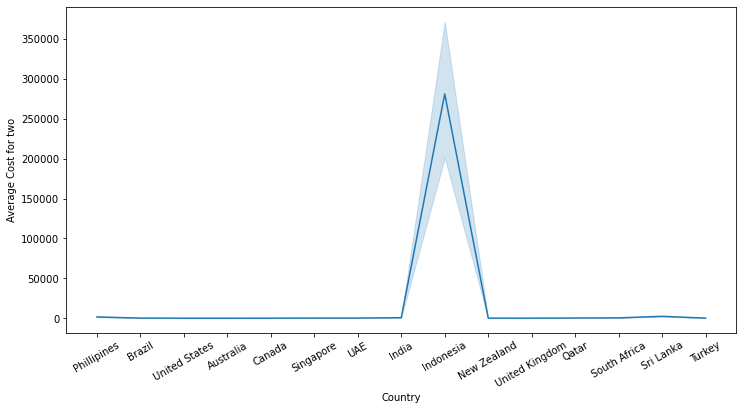

In [11]:
# plotting average cost for two with respect to the country
plt.figure(figsize=(12,6))
sns.lineplot(x="Country",y='Average Cost for two',data=df, palette='g')
plt.xticks(rotation=30)
plt.show()

The average cost for two is the highest in Indonesia.

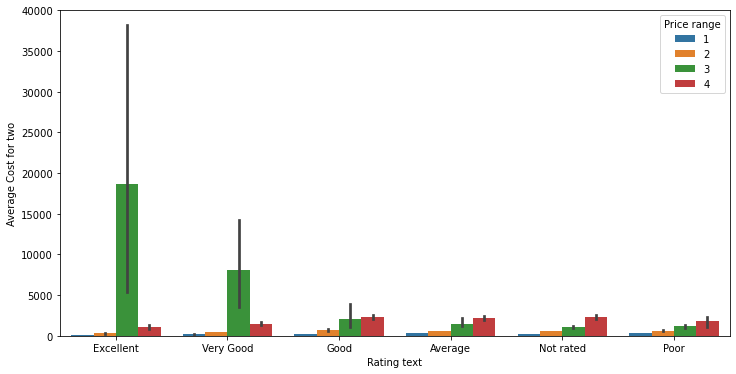

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Rating text'],y=df['Average Cost for two'],hue=df['Price range'])
plt.show()

The Average Cost for two seems to be correlated to the rating text, as restaurants with Excellent ratings seem to be on scale 3 of the price range and the average seems to be around the 17,000-18,000 mark

# Outliers, Skewness and VIF

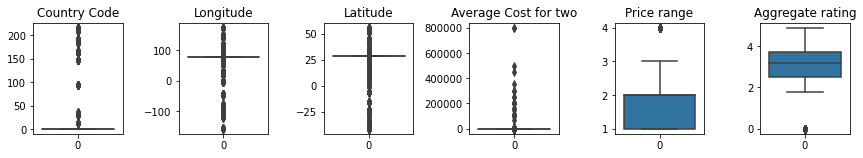

In [13]:
# outliers
num_feats = [i for i in df if df[i].dtypes!='O']
collist = df[num_feats].columns.values
nrows = 2
ncols = 6

plt.figure(figsize=(12,4))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v')
    plt.title(collist[i])
    plt.tight_layout()

all the numerical columns have outliers

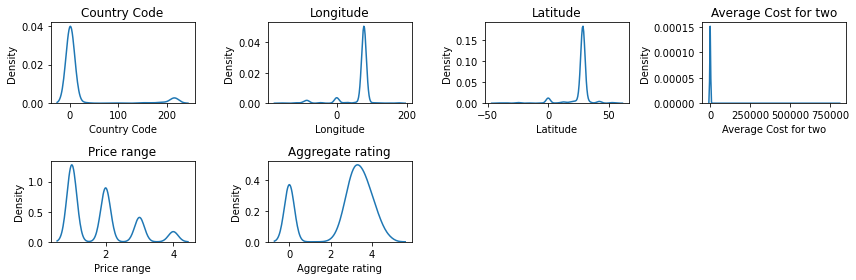

In [14]:
# skewness
collist = df[num_feats].columns.values
nrows = 2
ncols = 4

plt.figure(figsize=(12,4))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.kdeplot(data=df[collist[i]])
    plt.title(collist[i])
    plt.tight_layout()

In [15]:
#applying zscore to remove outliers
from scipy.stats import zscore
z = np.abs(zscore(df[num_feats]))
df_new = df.copy()
df_new = df.loc[(z<3).all(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 8.753010156004606 %


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_IQR.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 47.10501518165637 %


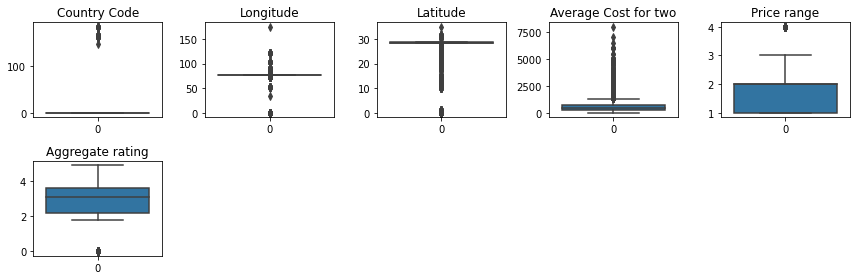

In [17]:
# outliers after zscore
collist = df_new[num_feats].columns.values
nrows = 2
ncols = 5

plt.figure(figsize=(12,4))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_new[collist[i]],orient='v')
    plt.title(collist[i])
    plt.tight_layout()

In [18]:
# label encoding variables
from sklearn.preprocessing import LabelEncoder
for i in df_new:
    if df_new[i].dtypes=='O':
        df_new[i] = LabelEncoder().fit_transform(df_new[i].values)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8715 entries, 0 to 9436
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       8715 non-null   int32  
 1   Country Code          8715 non-null   int64  
 2   City                  8715 non-null   int32  
 3   Longitude             8715 non-null   float64
 4   Latitude              8715 non-null   float64
 5   Cuisines              8715 non-null   int32  
 6   Average Cost for two  8715 non-null   int64  
 7   Currency              8715 non-null   int32  
 8   Has Table booking     8715 non-null   int32  
 9   Has Online delivery   8715 non-null   int32  
 10  Is delivering now     8715 non-null   int32  
 11  Price range           8715 non-null   int64  
 12  Aggregate rating      8715 non-null   float64
 13  Rating text           8715 non-null   int32  
 14  Country               8715 non-null   int32  
dtypes: float64(3), int32(

In [19]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Columns'] = df_new.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
1,Country Code,21.047179
2,City,13.072859
3,Longitude,100.167535
4,Latitude,98.153562
7,Currency,40.416398
11,Price range,20.090098
14,Country,20.274269


In [21]:
# dropping the latitude an longitude columns
df_new = df_new.drop(df_new[['Longitude','Latitude']],axis=1)

# Splitting into x & y for Regression

In [22]:
X = df_new.drop("Average Cost for two",axis=1)
Y = df_new['Average Cost for two']

In [23]:
#scaling and transforming
from sklearn.preprocessing import StandardScaler, power_transform
X = StandardScaler().fit_transform(X)
X = power_transform(X,method='yeo-johnson')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

# Model Creation for Average Cost for two

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model_name, r2, mse, mae, rmse, model_score= [],[],[],[],[],[]

def regr(model):
    model.fit(X_train,Y_train) #fitting the training data into the model
    Y_pred = model.predict(X_test) #predicting the target variable
    scoree = round(model.score(X_train,Y_train)*100,2) #score
    r2_s = round(r2_score(Y_test,Y_pred)*100,2) 
    mae_ = mean_absolute_error(Y_test,Y_pred) 
    mse_ = mean_squared_error(Y_test,Y_pred)
    rmse_ = mean_squared_error(Y_test,Y_pred,squared=False)
    
    print("Model:",str(model).split('(')[0])
    model_name.append(str(model).split('(')[0])
    
    print("Score:",scoree)
    model_score.append(scoree)
    
    print("R2 Score:",r2_s)
    r2.append(r2_s)
    
    print("MAE:",mae_)
    mae.append(mae_)
    
    print("MSE:",mse_)
    mse.append(mse_)
    
    print("RMSE:",rmse_)
    rmse.append(rmse_)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
def run_regr():
    models = [LinearRegression(),
             SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(),
             KNeighborsRegressor(), GradientBoostingRegressor(),
             BaggingRegressor(), AdaBoostRegressor(),RandomForestRegressor()]
    for i in models:
        regr(i), print('-'*50,'\n')

In [27]:
run_regr()

Model: LinearRegression
Score: 62.47
R2 Score: 64.15
MAE: 199.7070449954952
MSE: 129476.06898387177
RMSE: 359.82783241971674
-------------------------------------------------- 

Model: SVR
Score: 34.66
R2 Score: 34.65
MAE: 218.47424278064017
MSE: 236027.81874192477
RMSE: 485.8269432029524
-------------------------------------------------- 

Model: DecisionTreeRegressor
Score: 99.99
R2 Score: 70.26
MAE: 140.32813217072052
MSE: 107408.57044515833
RMSE: 327.7324677921892
-------------------------------------------------- 

Model: ExtraTreeRegressor
Score: 99.98
R2 Score: 75.72
MAE: 147.5263882514915
MSE: 87705.02524093621
RMSE: 296.1503422941399
-------------------------------------------------- 

Model: KNeighborsRegressor
Score: 80.44
R2 Score: 72.66
MAE: 155.97062872877467
MSE: 98756.56356126664
RMSE: 314.2555704538372
-------------------------------------------------- 

Model: GradientBoostingRegressor
Score: 86.5
R2 Score: 84.6
MAE: 130.09857394767036
MSE: 55627.21255412271
RMSE: 235

In [28]:
regression_models = pd.DataFrame({'Model':model_name,'R2':r2,'MSE':mse,'RMSE':rmse,'MAE':mae})
regression_models.sort_values(by='R2',ascending=False)

,Model,R2,MSE,RMSE,MAE
8,RandomForestRegressor,85.18,53538.029533,231.382864,115.794161
5,GradientBoostingRegressor,84.60,55627.212554,235.854219,130.098574
6,BaggingRegressor,82.39,63607.392481,252.205060,120.096413
3,ExtraTreeRegressor,75.72,87705.025241,296.150342,147.526388
7,AdaBoostRegressor,74.92,90597.176212,300.993648,158.417473
4,KNeighborsRegressor,72.66,98756.563561,314.255570,155.970629
2,DecisionTreeRegressor,70.26,107408.570445,327.732468,140.328132
0,LinearRegression,64.15,129476.068984,359.827832,199.707045
1,SVR,34.65,236027.818742,485.826943,218.474243


# Splitting into x & y for Classification

In [29]:
x = df_new.drop("Price range",axis=1)
y = df_new['Price range']

In [30]:
#scaling and transforming
from sklearn.preprocessing import StandardScaler, power_transform
x = StandardScaler().fit_transform(x)
x = power_transform(x,method='yeo-johnson')

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [32]:
y_train.value_counts()

1    3243
2    2111
3     862
4     320
Name: Price range, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
# using SMOTE to balance the training data
x_train, y_train = SMOTE().fit_resample(x_train,y_train)

In [34]:
y_train.value_counts()

2    3243
1    3243
3    3243
4    3243
Name: Price range, dtype: int64

# Model Creation for Price Range

In [35]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [36]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':range(1,10)}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'none'}

Model: LogisticRegression
Accuracy Score: 94.68
f1 Score: 94.68
CV Score: 0.9497486543991405
ROC_AUC Score: 95.22
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1052
           2       0.96      0.92      0.94       750
           3       0.81      0.87      0.84       272
           4       0.82      0.90      0.86       105

    accuracy                           0.95      2179
   macro avg       0.89      0.92      0.91      2179
weighted avg       0.95      0.95      0.95      2179



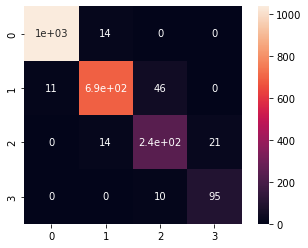

In [38]:
lr = LogisticRegression(penalty='none',C=1)
classification_model(lr) 

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'log_loss', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 98.26
f1 Score: 98.26
CV Score: 0.9404701966525874
ROC_AUC Score: 97.84
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1052
           2       0.98      0.99      0.98       750
           3       0.94      0.94      0.94       272
           4       0.96      0.92      0.94       105

    accuracy                           0.98      2179
   macro avg       0.97      0.96      0.97      2179
weighted avg       0.98      0.98      0.98      2179



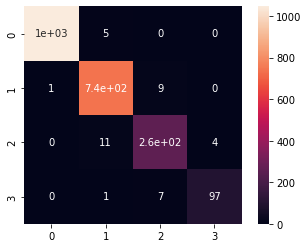

In [40]:
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best')
classification_model(dtc)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

Model: RandomForestClassifier
Accuracy Score: 97.66
f1 Score: 97.66
CV Score: 0.9643234076617617
ROC_AUC Score: 97.35
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1052
           2       0.97      0.98      0.98       750
           3       0.94      0.91      0.93       272
           4       0.92      0.93      0.92       105

    accuracy                           0.98      2179
   macro avg       0.96      0.96      0.96      2179
weighted avg       0.98      0.98      0.98      2179



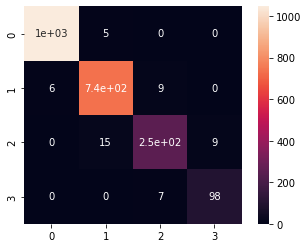

In [42]:
rfc = RandomForestClassifier(n_estimators=150,criterion='entropy')
classification_model(rfc)

In [43]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 100}

Model: AdaBoostClassifier
Accuracy Score: 96.74
f1 Score: 96.74
CV Score: 0.967534548499563
ROC_AUC Score: 95.91
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1052
           2       0.96      0.97      0.97       750
           3       0.93      0.86      0.89       272
           4       0.92      0.89      0.90       105

    accuracy                           0.97      2179
   macro avg       0.95      0.93      0.94      2179
weighted avg       0.97      0.97      0.97      2179



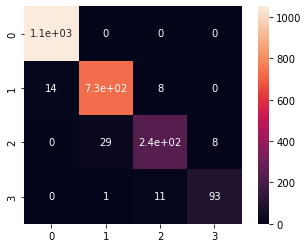

In [44]:
ada = AdaBoostClassifier(n_estimators=50,algorithm='SAMME')
classification_model(ada) 

In [45]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 100}

Model: BaggingClassifier
Accuracy Score: 98.39
f1 Score: 98.39
CV Score: 0.9455160682122206
ROC_AUC Score: 98.15
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1052
           2       0.98      0.99      0.99       750
           3       0.96      0.95      0.95       272
           4       0.93      0.94      0.93       105

    accuracy                           0.98      2179
   macro avg       0.97      0.97      0.97      2179
weighted avg       0.98      0.98      0.98      2179



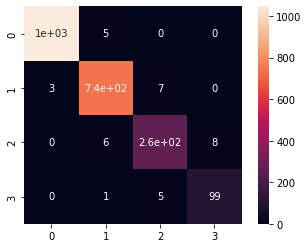

In [46]:
bc = BaggingClassifier(n_estimators=100)
classification_model(bc)

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 95.82
f1 Score: 95.82
CV Score: 0.9552574547867578
ROC_AUC Score: 94.83
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1052
           2       0.97      0.96      0.96       750
           3       0.85      0.87      0.86       272
           4       0.82      0.82      0.82       105

    accuracy                           0.96      2179
   macro avg       0.91      0.91      0.91      2179
weighted avg       0.96      0.96      0.96      2179



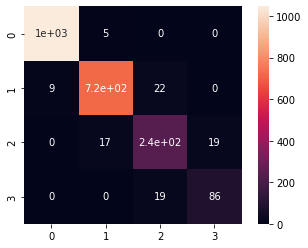

In [48]:
svc = SVC(kernel='rbf',C=10)
classification_model(svc)

In [49]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,
                                  'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='ROC_AUC Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
4,BaggingClassifier,98.39,98.39,0.945516,98.15
1,DecisionTreeClassifier,98.26,98.26,0.940470,97.84
2,RandomForestClassifier,97.66,97.66,0.964323,97.35
3,AdaBoostClassifier,96.74,96.74,0.967535,95.91
0,LogisticRegression,94.68,94.68,0.949749,95.22
5,SVC,95.82,95.82,0.955257,94.83


According to the performance metrics Bagging Classifier is the best model with an F1 Score of 98.26 and ROC_AUC Score of 97.95

<AxesSubplot:>

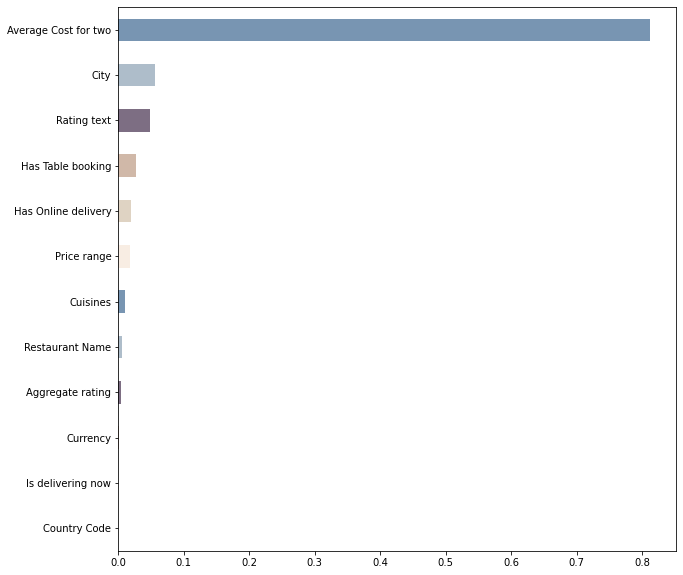

In [50]:
# Feature importance of the classifier
pd.Series(dtc.feature_importances_, index = df_new.columns[:-1]).sort_values(ascending=True).plot(kind='barh', figsize=(10,10),
                                                                                                 color=(['#F8EDE3','#DFD3C3',
                                                                                                         '#D0B8A8','#7D6E83',
                                                                                                         '#AEBDCA','#7895B2']))

# Saving the model

In [51]:
import joblib 
joblib.dump(bc,'BC_Zomato_PriceRange.pkl')

['BC_Zomato_PriceRange.pkl']

In [52]:
joblib.dump(RandomForestRegressor(),'RFR_Zomato_AvgCostTwo.pkl')

['RFR_Zomato_AvgCostTwo.pkl']